In [1]:
%config InlineBackend.figure_formats = ['svg']
import quimb.tensor as qtn
import quimb as qu
import cotengra as ctg
import autoray as ar
import register_ as reg
import algo_cooling as algo
import algo_dmrg
import quf
import time
import numpy as np

/Users/rezah/Documents/prac/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/rezah/Documents/prac/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-11-24 11:02:59,160	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [2]:
reg.reg_complex_svd()
import torch
to_backend = algo.backend_torch(device = "cpu", dtype = torch.complex128)
to_backend_ = algo.backend_numpy( dtype = "complex128")

opt = algo.opt_(progbar=False)

In [3]:
L = 16
p = qtn.MPS_rand_state(L=L, bond_dim=20, seed=4)


/Users/rezah/Documents/prac/.venv/lib/python3.9/site-packages/autoray/autoray.py:94: RuntimeWarning: divide by zero encountered in matmul
  return func(*args, **kwargs)
/Users/rezah/Documents/prac/.venv/lib/python3.9/site-packages/autoray/autoray.py:94: RuntimeWarning: overflow encountered in matmul
  return func(*args, **kwargs)
/Users/rezah/Documents/prac/.venv/lib/python3.9/site-packages/autoray/autoray.py:94: RuntimeWarning: invalid value encountered in matmul
  return func(*args, **kwargs)


In [4]:
info_c = {}
mpo =qtn.MPO_rand(L, phys_dim=2, bond_dim=4)
# mpo =qtn.MPO_identity(L, phys_dim=2)

mpo.canonicalize_([5, L-1], cur_orthog='calc', info=info_c)
mpo.show()

mpo_g = algo_dmrg.gate_1d(mpo, (6, L-1), qu.CNOT(), ind_id="k{}", site_tags="I{}", contract='split-gate', inplace=False)
mpo_g = algo_dmrg.gate_1d(mpo, (6, L-1), qu.CNOT(), ind_id="b{}", site_tags="I{}", contract='split-gate', inplace=False)

algo_dmrg.gate_1d(mpo_g, (5, 12), qu.CNOT(), ind_id="k{}", site_tags="I{}", contract='split-gate', inplace=True)
algo_dmrg.gate_1d(mpo_g, (5, 12), qu.CNOT(), ind_id="b{}", site_tags="I{}", contract='split-gate', inplace=True)

algo_dmrg.gate_1d(mpo_g, (6, 14), qu.CNOT(), ind_id="k{}", site_tags="I{}", contract='split-gate', inplace=True)
algo_dmrg.gate_1d(mpo_g, (6, 14), qu.CNOT(), ind_id="b{}", site_tags="I{}", contract='split-gate', inplace=True)




│4│4│4│4│4│4│4│4│4│4│4│4│4│4│4│
>─>─>─>─>─●─●─●─●─●─●─●─●─●─●─●
│ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │


MatrixProductOperator(tensors=26, indices=62, L=16, max_bond=4)

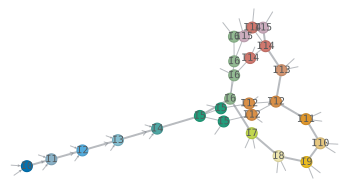

0.9999999999999983

In [5]:
mpo_g.draw(mpo.site_tags, legend=False)
mpo_g.norm()

In [6]:
fit = algo_dmrg.FIT(mpo_g, p = mpo, site_tag_id="I{}", opt=opt, re_tag=False, range_int=[5,L-1])
# fit.visual(figsize=(12,12), show_inds="bond-size", show_tags=True)


ImportError: autoray couldn't find function 'stop_gradient' for backend 'numpy'.

In [ ]:
start_time = time.time()
fit.run_gate(n_iter=5, verbose=True)
print(f"--- %s reuse ---" % (time.time() - start_time))
start_time = time.time()
value = fit.p.norm()
fit.loss

In [ ]:
fit = algo_dmrg.FIT(mpo_g, p = mpo, site_tag_id="I{}", opt=opt, re_tag=False, range_int=[5,L-1])

start_time = time.time()
fit.run_eff(n_iter=5, verbose=True)
print(f"--- %s reuse ---" % (time.time() - start_time))
start_time = time.time()
value = fit.p.norm()
fit.loss

In [ ]:
fit = algo_dmrg.FIT(mpo_g, p = mpo, site_tag_id="I{}", opt=opt, re_tag=False, range_int=[5,L-1])

start_time = time.time()
fit.run(n_iter=5, verbose=True)
print(f"--- %s reuse ---" % (time.time() - start_time))
start_time = time.time()
value = fit.p.norm()
print(value)
fit.loss


In [ ]:
info_c = {}
p = qtn.MPS_rand_state(L=L, bond_dim=20, seed=4)
p.canonicalize_([5, L-1], cur_orthog='calc', info=info_c)

p_g = algo_dmrg.gate_1d(p, (6, L-1), qu.CNOT(), ind_id="k{}", site_tags="I{}", contract='split-gate', inplace=False)
algo_dmrg.gate_1d(p_g, (5, 12), qu.CNOT(), ind_id="k{}", site_tags="I{}", contract='split-gate', inplace=True)
p_g = algo_dmrg.gate_1d(p_g, (6, 14), qu.CNOT(), ind_id="k{}", site_tags="I{}", contract='split-gate', inplace=True)






In [ ]:
p_g.draw(p.site_tags, legend=False)

In [ ]:
fit = algo_dmrg.FIT(p_g, p=p, site_tag_id="I{}", opt=opt, re_tag=False, range_int=[5,L-1])
fit.visual(figsize=(17,17), show_inds="bond-size", show_tags=True)


In [ ]:
p_g

In [ ]:
fit = algo_dmrg.FIT(p_g, p=p, site_tag_id="I{}", opt=opt, re_tag=False, range_int=[5,L-1])

start_time = time.time()
fit.run_gate(n_iter=5, verbose=True)
print(f"--- %s reuse ---" % (time.time() - start_time))
start_time = time.time()
value = fit.p.norm()



In [ ]:
fit.loss

In [ ]:
fit = algo_dmrg.FIT(p_g, p=p, site_tag_id="I{}", opt=opt, re_tag=False)

start_time = time.time()
fit.run(n_iter=5, verbose=True)
print(f"--- %s reuse ---" % (time.time() - start_time))
start_time = time.time()
value = fit.p.norm()



In [ ]:
fit.loss

In [ ]:
fit = algo_dmrg.FIT(p_g, p=p, site_tag_id="I{}", opt=opt, re_tag=False)

start_time = time.time()
fit.run_eff(n_iter=5, verbose=True)
print(f"--- %s reuse ---" % (time.time() - start_time))
start_time = time.time()
value = fit.p.norm()



In [ ]:
fit.loss